This is the second half of the module 3 assignment. The full module 3 assignment will be due on Wednesday, February 23 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas. 

> Rafael Piloto, Zhuo Chen, Rex Xu, Muyi Chen

1. We discussed in class solving systems of coupled first order ODEs using Euler and 2nd order Runge-Kutta methods. Here, you'll look at a famous and slightly more complex model for describing predator-prey dynamics in an ecosystem.

The Lotka-Volterra model describes a prey animal species, $x$, whose population grows at a growth rate, $r$, proportional to the population in the absence of predators. When a predator species, $y$, is present, however, there is second term that describes predation, which acts to decrease the prey population. The predation rate, $axy$, is proportional to (1) the number of predators (more predators will consume more prey) and (2) the number of prey (the prey population size affects how much the predators can eat).  

The dynamics of the number of the prey for this model is given by:

$\frac{dx}{dt} = rx - axy$

The number of predators also changes with time. Here, the predator growth rate, $b$, is proportional to (1) the total number of predators (more predators can produce more offspring), and (2) the number of prey (more available food also leads to more offspring). While there is nothing to prey upon the predators, they do die of natural causes at a rate, $d$, which is proportional to the population of predators (more predators means more death).

The dynamics of the number of predators for this model is given by: 

$\frac{dy}{dt} = b x y - d y$.

While the cross-term makes this system nonlinear and prevents us from representing this as a matrix equation, we can still solve this system of equations using the Euler and Runge-Kutta methods.






(a) write a function that solves this equation using the Euler method. Inputs to your function should include $r$, $a$, $b$, $d$, a time array, $t$, which contains uniformly spaced time points between $t = 0$ and $t=T$, and an initial condition array for both $x$ and $y$ populations. Your function should output $x$ and $y$ as a function of time.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pgEuler(a, r, b, d, t, x0, y0):
  x = np.zeros(len(t))
  x[0] = x0

  y = np.zeros(len(t))
  y[0] = y0

  for i in range(len(t)-1):
    dt = t[i + 1] - t[i]
    
    x[i+1] = x[i] + dt * (r * x[i] - (a * x[i] * y[i]))
    y[i+1] = y[i] + dt * (b * x[i] * y[i] - (d * y[i]))

  return x, y

(b) write a function similar to the one in (a), but here use the 2nd order Runge-Kutta method.

In [ ]:
def pgRK2(a, r, b, d, t, x0, y0):
  x = np.zeros(len(t))
  x[0] = x0

  y = np.zeros(len(t))
  y[0] = y0

  for i in range(len(t)-1):
    dt = t[i + 1] - t[i]

    xPred = x[i] + dt * (r * x[i] - (a * x[i] * y[i]))
    yPred = y[i] + dt * (b * x[i] * y[i] - (d * y[i]))

    xPrime = r * x[i] - (a * x[i] * y[i])
    yPrime = b * x[i] * y[i] - (d * y[i])

    xPrimePred = r * xPred - (a * xPred * yPred)
    yPrimePred = b * xPred * yPred - (d * yPred)

    x[i+1] = x[i] + (0.5 * (xPrime + xPrimePred) * dt)
    y[i+1] = y[i] + (0.5 * (yPrime + yPrimePred) * dt)

  return x, y

(c) Run both functions for the parameter values below. How do the results compare for the two integration techniques?

$x_0 = 5$

$y_0 = 5$

$dt = 0.001$                  
$T = 10.0$        
         
$r = 7.0$                      
$a = 2.0$                       
$b = 1.5$                       
$d = 3.0$   

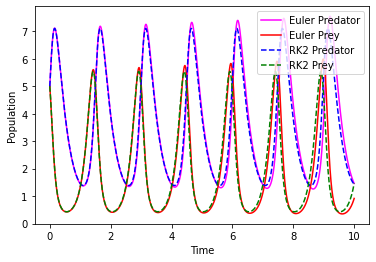

In [ ]:
x0 = 5      # prey
y0 = 5      # predator
dt = 0.001  # timestep
T = 10.0    # total sim time
r = 7.0     # population growth rate of prey
a = 2.0     # predation rate
b = 1.5     # population growth rate of predator
d = 3.0     # natural causes death rate of predator

t = np.arange(0, T, dt)

x_e, y_e = pgEuler(a, r, b, d, t, x0, y0)
x_RK2, y_RK2 = pgRK2(a, r, b, d, t, x0, y0)

fig, ax = plt.subplots(1, 1)

ax.plot(t, y_e, label="Euler Predator", color="magenta")
ax.plot(t, x_e, label="Euler Prey", color="red")
ax.plot(t, y_RK2, '--', label="RK2 Predator", color="blue")
ax.plot(t, x_RK2, '--', label="RK2 Prey", color="green")

ax.set(xlabel="Time", ylabel = "Population")

plt.legend()
plt.show()

> The two methods appear to be producing slightly different results as time increases. The Euler method has a much wider spread whereas the RK2 method retains the same spread throughout.

(d) decrease the timestep to $dt = 0.0001$ and re-run both techniques.  Do you notice any changes? Does one method appear better than the other, and if so, why?

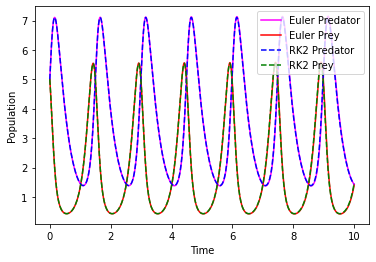

In [ ]:
t2 = np.arange(0, T, 0.0001)

x_e, y_e = pgEuler(a, r, b, d, t2, x0, y0)
x_RK2, y_RK2 = pgRK2(a, r, b, d, t2, x0, y0)

fig, ax = plt.subplots(1, 1)

ax.plot(t2, y_e, label="Euler Predator", color="magenta")
ax.plot(t2, x_e, label="Euler Prey", color="red")
ax.plot(t2, y_RK2, '--', label="RK2 Predator", color="blue")
ax.plot(t2, x_RK2, '--', label="RK2 Prey", color="green")

ax.set(xlabel="Time", ylabel = "Population")

plt.legend()
plt.show()

> Both methods appear to produce the same results. Since we are providing a much smaller dt, we are better approximating values with finer detail.

2. While we cannot solve this system analytically to verify our numerical results, there are some tests we can do to see if our model implementation makes sense. This question will explore some of these checks.

(a) A *fixed point* is a defined by a location where the derivates equal 0 (and therefore the dynamics are not changing).  Find the values for $x$ and $y$ (in terms of other parameters in the system) associated with fixed points.  Choose a parameter that satisfies these conditions, and run your two methods. How do the populations change through time? Does the system behave the way you expect?

$\frac{dy}{dt} = b x y - d y$
- Zero when, $bxy = dy$
- $\therefore x = \frac{d}{b}$

$\frac{dx}{dt} = rx - axy$
- Zero when, $rx = axy$
- $\therefore y = \frac{r}{a}$

x_0: 2.0
y_0: 3.5


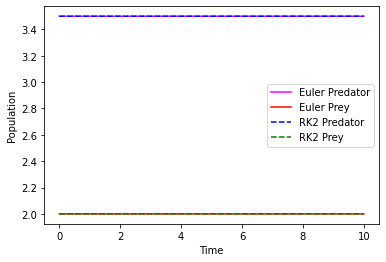

In [ ]:
test_x0 = d/b    # prey
print(f"x_0: {test_x0}")
test_y0 = r/a    # predator
print(f"y_0: {test_y0}")

t3 = np.arange(0, T, 0.0001)

x_e, y_e = pgEuler(a, r, b, d, t3, test_x0, test_y0)
x_RK2, y_RK2 = pgRK2(a, r, b, d, t3, test_x0, test_y0)

fig, ax = plt.subplots(1, 1)

ax.plot(t3, y_e, label="Euler Predator", color="magenta")
ax.plot(t3, x_e, label="Euler Prey", color="red")
ax.plot(t3, y_RK2, '--', label="RK2 Predator", color="blue")
ax.plot(t3, x_RK2, '--', label="RK2 Prey", color="green")

ax.set(xlabel="Time", ylabel = "Population")

plt.legend()
plt.show()

> The populations do not change. This is expected sine our derivatives are zero. If our derivatives are zero at $t_i$ and our parameters are not changing, then $t_i+1$ will also be zero. Therefore, the population is maintained at the provided $x_0$ and $y_0$.

(b) Think about the equations that describe this model, and discuss your expectations for the large and small limits of each parameter. Test your intuition by running your RK2 code, plotting the results, and discussing what happens to the populations.  Is this consistent with your expectations? 

Given that we know the following:

Let X = the population of prey

Let Y = the population of predators

- **r: Population growth rate of prey**
  - As `r` _increases_, we expect to see X and Y increase. This might be because as prey increase, predators will have more food.
  - As `r` _decreases_, we expect to see X decrease and Y decrease. This might be because as the population of prey slower, predators will kill off prey at the same rate causing them to potentially fall off.

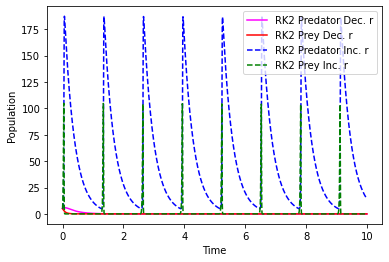

In [ ]:
x0 = 5    # prey
y0 = 5    # predator
dt = 0.001  # timestep
T = 10.0    # total sim time
r = 7.0
a = 2.0     # predation rate
b = 1.5     # population growth rate of predator
d = 3.0     # natural causes death rate of predator

t = np.arange(0, T, dt)

x_RK2_L, y_RK2_L = pgRK2(a, 100, b, d, t, x0, y0)
x_RK2_S, y_RK2_S = pgRK2(a, 0.01, b, d, t, x0, y0)

fig, ax = plt.subplots(1, 1)

ax.plot(t, y_RK2_S, label="RK2 Predator Dec. r", color="magenta")
ax.plot(t, x_RK2_S, label="RK2 Prey Dec. r", color="red")
ax.plot(t, y_RK2_L, '--', label="RK2 Predator Inc. r", color="blue")
ax.plot(t, x_RK2_L, '--', label="RK2 Prey Inc. r", color="green")

ax.set(xlabel="Time", ylabel = "Population")

plt.legend()
plt.show()

These result seen above match slightly what I expected. When increased, the higher population of predators cause prey to die off, thus causing the population of predators to die off as well. When decreased, it matched my expectations.

- **a: Predation rate**
  - As `a` _increases_, we expect to see X decrease, then Y decrease. This might be because as predators eat more prey, prey die faster, but then there is not much food left, so predators will slowly fall off.
  - As `a` _decreases_, we expect to see X increase, then Y increase. This might be because as predators eat less prey, prey will increase due to more food being available.

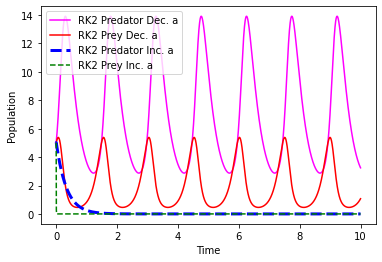

In [ ]:
x_RK2_L, y_RK2_L = pgRK2(100, r, b, d, t, x0, y0)
x_RK2_S, y_RK2_S = pgRK2(1, r, b, d, t, x0, y0)

fig, ax = plt.subplots(1, 1)

ax.plot(t, y_RK2_S, label="RK2 Predator Dec. a", color="magenta")
ax.plot(t, x_RK2_S, label="RK2 Prey Dec. a", color="red")
ax.plot(t, y_RK2_L, '--', linewidth=3, label="RK2 Predator Inc. a", color="blue")
ax.plot(t, x_RK2_L, '--', label="RK2 Prey Inc. a", color="green")

ax.set(xlabel="Time", ylabel = "Population")

plt.legend()
plt.show()

This behaved the way I expected with a minor correction. As predation rate increases, prey die off quickly causing the predator population to kill its' off. When the predation rate decreases, prey population increases causing the predator population to increase, however, this causing the prey population to decrease thus causing the predator population to decrease. It repeats.

- **b: Population growth rate of predator**
  - As `b` _increases_, we expect to see Y increase, then X decrease, then Y decrease. This might be because as predators increase, prey will decrease causing predators to fall off.
  - As `b` _decreases_, we expect to see Y increase, then X increase, then Y increase faster. This might be because as predators grow at a slower rate, prey will live longer, then causing more food to be available so predators will increase.

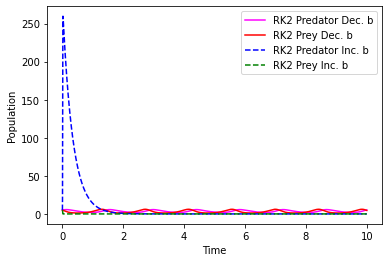

In [ ]:
x_RK2_L, y_RK2_L = pgRK2(a, r, 100, d, t, x0, y0)
x_RK2_S, y_RK2_S = pgRK2(a, r, 1, d, t, x0, y0)

fig, ax = plt.subplots(1, 1)

ax.plot(t, y_RK2_S, label="RK2 Predator Dec. b", color="magenta")
ax.plot(t, x_RK2_S, label="RK2 Prey Dec. b", color="red")
ax.plot(t, y_RK2_L, '--', label="RK2 Predator Inc. b", color="blue")
ax.plot(t, x_RK2_L, '--', label="RK2 Prey Inc. b", color="green")

ax.set(xlabel="Time", ylabel = "Population")

plt.legend()
plt.show()

This behaved the way I expected.

- **d: Natural causes death rate of predator**
  - As `d` _increases_, we expect to see Y decrease and X increase. This might be because predators will be dying faster of natural causes causing prey to live longer.
  - As `d` _decreases_, we expect to see Y increase and X decrease, then Y decrease. This might be because predators will be living longer killing more prey, but eventually fall off as the population of prey decreases.  

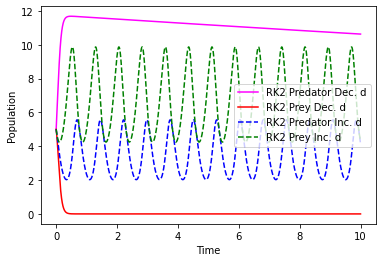

In [ ]:
x_RK2_L, y_RK2_L = pgRK2(a, r, b, 10, t, x0, y0)
x_RK2_S, y_RK2_S = pgRK2(a, r, b, 0.01, t, x0, y0)

fig, ax = plt.subplots(1, 1)

ax.plot(t, y_RK2_S, label="RK2 Predator Dec. d", color="magenta")
ax.plot(t, x_RK2_S, label="RK2 Prey Dec. d", color="red")
ax.plot(t, y_RK2_L, '--', label="RK2 Predator Inc. d", color="blue")
ax.plot(t, x_RK2_L, '--', label="RK2 Prey Inc. d", color="green")

ax.set(xlabel="Time", ylabel = "Population")

plt.legend()
plt.show()

This behaves the way I expected. However, the longer prey live, the more the predator population lives.

(c) What might you expect for small deviations from the fixed points you found in part (a) and why? Test your predictions by running your code for a parameter set that is not quite consistent with a fixed point. Qualitatively describe the resulting population dynamics? Does this agree with your intuition?

I would expect to see small changes in population since the derivative would barely be above 0.

x_0: 2.1
y_0: 3.6
x2_0: 2.1
y2_0: 3.6


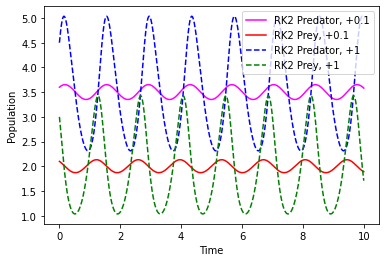

In [ ]:
test_x0 = (d/b) + 0.1 # prey
print(f"x_0: {test_x0}")
test_y0 = (r/a) + 0.1 # predator
print(f"y_0: {test_y0}")

test_x1 = (d/b) + 1 # prey
print(f"x2_0: {test_x0}")
test_y1 = (r/a) + 1 # predator
print(f"y2_0: {test_y0}")

t3 = np.arange(0, T, 0.0001)

x_RK2_0, y_RK2_0 = pgRK2(a, r, b, d, t3, test_x0, test_y0)
x_RK2_1, y_RK2_1 = pgRK2(a, r, b, d, t3, test_x1, test_y1)

fig, ax = plt.subplots(1, 1)

ax.plot(t3, y_RK2_0, label="RK2 Predator, +0.1", color="magenta")
ax.plot(t3, x_RK2_0, label="RK2 Prey, +0.1", color="red")
ax.plot(t3, y_RK2_1, '--', label="RK2 Predator, +1", color="blue")
ax.plot(t3, x_RK2_1, '--', label="RK2 Prey, +1", color="green")

ax.set(xlabel="Time", ylabel = "Population")

plt.legend()
plt.show()

Yes, this agrees with my intuition. We see small changes over time. The more we deviate from the fixed points, the more chaotic the graph becomes.